inserting in a position takes O(n) time complexity

In [8]:
arr=[0,34,6,2,1]
arr.insert(10000,89)
print(arr)

[0, 34, 6, 2, 1, 89]


Insert in o(logn) in a Binary Search Tree. This will always be i. Better to add the new node as a leaf node

In [ ]:
class Node: 
    def __init__(self, value): 
        self.value = value 
        self.left = None
        self.right = None


def add_node(root, value):
    if root is None:
        return Node(value)
    else:
        if value < root.value:
            root.left = add_node(root.left, value)
        else:
            root.right = add_node(root.right, value)
    return root

Removing the minimum is actually pretty easy

In [ ]:
def find_min(root):
    temp=root
    
    while temp and temp.left:
        temp = temp.left
    return temp


Time to remove a node

In [ ]:
def remove_node(root, value):
    if not root:
        return root
    if value < root.value:
        root.left = remove_node(root.left, value)
    elif value > root.value:
        root.right = remove_node(root.right, value)
    else:
        if not root.left:
            return root.right
        if not root.right:
            return root.left
        temp = find_min(root.right)
        root.value = temp.value
        root.right = remove_node(root.right, temp.value)
    return root

This above code has two cases:
- Is the value having 0/1 child nodes?
- Is the value having 2 child nodes?

in the second case, it takes the minimum of the right subtree, and puts that value into the root, while removing that minimum value

Writing a Recursive function for inserting an element:


In [1]:
def helper_insert(self, curr_node, value):
    if curr_node is None:
        return Node(value)
    if value < curr_node.value:
        curr_node.left = self.helper_insert(curr_node.left, value)
    else:
        curr_node.right = self.helper_insert(curr_node.right, value)
    return curr_node


def r_insert(self,value):
    self.root= self.helper_insert(self.root, value)
    if self.root is None:
        self.root= Node(value)
    


IndentationError: expected an indented block (4070246173.py, line 1)

LADS!!!! TIME TO DO THE CLASSIC INVERT BINARY TREE

In [14]:
class Node:
    def __init__(self, value) -> None:
        self.left=None
        self.right=None
        self.value=value

class Tree:
    def __init__(self) -> None:
        self.root=None

    def insert(self, value):
        if self.root is None:
            self.root= Node(value)
        else:
            self.helper_insert(self.root, value)
    def helper_insert(self, curr_node, value):
        if curr_node is None:
            return Node(value)
        if value < curr_node.value:
            curr_node.left = self.helper_insert(curr_node.left, value)
        else:
            curr_node.right = self.helper_insert(curr_node.right, value)
        return curr_node

    def invert(self):
        self.helper_invert(self.root)
        if self.root is None:
            return None
    
    def helper_invert(self, node):
        if node is None:
            return None
        temp= node.left

        node.left= self.helper_invert(node.right)
        node.right= self.helper_invert(temp)

        return node
    
    def in_order_traversal(self, node, result=[]):
        if node:
            self.in_order_traversal(node.left, result)
            result.append(node.value)
            self.in_order_traversal(node.right, result)
        return result

    def print_in_order(self):
        result = self.in_order_traversal(self.root, [])
        print("In-order traversal:", result)
    
    
    def BFS(self):
        if not self.root:
            return []
        
        bruh= self.root
        
        result=[]
        queue=[]

        queue.append(bruh)
        while len(queue) > 0:
            temp= queue.pop(0)
            result.append(temp.value)
            if temp.left:
                queue.append(temp.left)
            if temp.right:
                queue.append(temp.right)
        return "Level-order traversal: " + str(result)


hello= Tree()
hello.insert(47)
hello.insert(21)
hello.insert(76)
hello.insert(18)
hello.insert(27)
hello.insert(52)
hello.insert(82)

#hello.invert()
hello.print_in_order()

print(hello.BFS())

In-order traversal: [18, 21, 27, 47, 52, 76, 82]
Level-order traversal: [47, 21, 76, 18, 27, 52, 82]


Level Order Traversal aka BFS (DOne above)

DFS pre-order done below:

In [19]:
def DFSpre(self):
    bruh= self.root
    result=[]
    def traverse(node):
        result.append(node.value)
        if node.left is not None:
            #result.append(node.value) erroneous
            traverse(node.left)
        if node.right is not None:
            #result.append(node.value) erroneous
            traverse(node.right)
    traverse(bruh)
    return result

print(DFSpre(hello))

[47, 21, 18, 27, 76, 52, 82]


DFS Post-oder

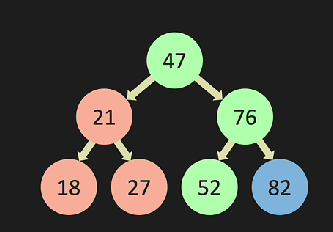

In [23]:
#same shit just append the results in the end, so the leaf nodes get in the list first

def DFSPost(self):
    bruh= self.root
    result=[]
    def traverse(node):
        if node.left is not None:
            #result.append(node.value) erroneous
            traverse(node.left)
        if node.right is not None:
            #result.append(node.value) erroneous
            traverse(node.right)
        result.append(node.value)
    traverse(bruh)
    return result

print(DFSPost(hello))

[18, 27, 21, 52, 82, 76, 47]


In [22]:
def DFSIN(self):
    bruh= self.root
    result=[]
    def traverse(node):
        if node.left is not None:
            #result.append(node.value) erroneous
            traverse(node.left)
        result.append(node.value)
        if node.right is not None:
            #result.append(node.value) erroneous
            traverse(node.right)
        
    traverse(bruh)
    return result

print(DFSIN(hello))

[18, 21, 27, 47, 52, 76, 82]


In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right

class Solution:
    def rightSideView(self, root: Optional[TreeNode]) -> List[int]:
        res=[]
        q=deque([root])

        while q:
            righty=None
            qlen=len(q)
            for i in range(qlen):
                node=q.popleft()
                if node:
                    righty=node
                    #this will always store the right child as the left child will always be popped and searched for its children.
                    q.append(node.left)
                    q.append(node.right)
                    #you can do reverse this to do left side view
            if righty:
                res.append(righty.val)
        return res
        